In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

In [2]:
#Read the plants dataset using pandas
X = pd.read_csv('dataset/plants_dataset.csv')
X.head()

#Extract each data column
stem_l = X['stem_length'].values
stem_d = X['stem_diameter'].values
leaf_l = X['leaf_length'].values
leaf_w = X['leaf_width'].values

#Join the stem and leaf values in an array
stem = np.concatenate([stem_l, stem_d])
leaf = np.concatenate([leaf_l, leaf_w])
#Stack the data to make a 2-d Array
data = np.column_stack((stem,leaf))

In [3]:
#K-means clustering 
def kmeans(data, k):
    num_of_rows = data.shape[0]
    num_of_columns = data.shape[1]

    #Pick K random data points as initial centroids along the dataset
    initial_centroids = np.random.choice(num_of_rows, k, replace=False)
    centroids = data[initial_centroids]
    #numpy array to hold all the previous centroids
    centroids_old = np.zeros((k, num_of_columns))
    #numpy array to hold all the centroid assignments for each data point
    cluster_assigned = np.zeros(num_of_rows)

    #Iterate until no more changes are left to be made to the centroids
    while (centroids_old != centroids).any():
        centroids_old = centroids.copy()

        #Calculate distances between data points and centroids
        centroid_distance = distance_matrix(data, centroids)

        #Assignment step
        for i in np.arange(num_of_rows):
            
            d = centroid_distance[i]
            closest_centroid = (np.where(d == np.min(d)))[0][0]

            # Assign data point with closest centroid
            cluster_assigned[i] = closest_centroid

        # Update step
        for i in np.arange(k):
            updatedCentroid = data[cluster_assigned == i]
            centroids[i] = np.apply_along_axis(np.mean, axis=0, arr=updatedCentroid)

    return centroids, cluster_assigned

In [4]:
#Set an array of colors
def plot(cluster_assigned):
    colors = ['r', 'g', 'b','y']
    f = lambda x: colors[int(x)]
    #Maps each datapoint to a colour of that particular cluster
    cluster_assigned = list(map(f, cluster_assigned))
    plt.xlabel('Stem length', fontsize=12)
    plt.ylabel('Stem diameter', fontsize=12)
    plt.title('K-means clustering - 4 clusters', fontsize=12)

    #Iterate through the number of centroids and plot the data
    for i in range(K):
        plt.scatter(centroids[:,0], centroids[:,1], color='black', s=200)
    plt.scatter(data[:,0], data[:,1], color=cluster_assigned, s=10)
    plt.savefig('K-means-4.png')

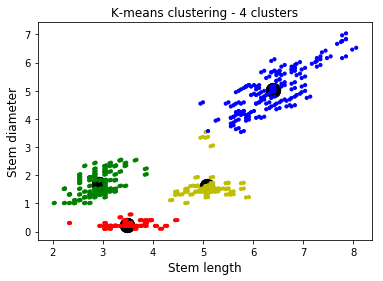

In [5]:
#Set the value for the number of clusters
K = 4

#Call the kmeans functions
k_means_res = kmeans(data, K)

#Get the return values from the kmeans function
centroids = k_means_res[0]
cluster_assigned = (k_means_res[1]).tolist()
plot(cluster_assigned)